In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithms import MyStandardScaler , MyPCA
from sklearn.preprocessing import StandardScaler
import warnings; warnings.simplefilter('ignore')

In [2]:
TRAIN_DATA_PATH = 'MNIST_train.csv'
VAL_DATA_PATH = 'MNIST_validation.csv'

train_data = pd.read_csv(TRAIN_DATA_PATH)
val_data = pd.read_csv(VAL_DATA_PATH)
train_data = train_data.drop(columns=['label'])
val_data = val_data.drop(columns=['label'])
train_data.shape, val_data.shape

((10002, 785), (2499, 785))

In [3]:
scaler = MyStandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
val_data = scaler.transform(val_data)

In [4]:
## now my implementation of PCA
pca98 =MyPCA(.98)
pca98.fit(train_data)
pca95 =MyPCA(.95)
pca95.fit(train_data)
pca90 =MyPCA(.90)
pca90.fit(train_data)
pca50 =MyPCA(.50)
pca50.fit(train_data)
pca98_train_img = pca98.transform(train_data)
pca98_test_img = pca98.transform(val_data)
pca95_train_img = pca95.transform(train_data)
pca95_test_img = pca95.transform(val_data)
pca90_train_img = pca90.transform(train_data)
pca90_test_img = pca90.transform(val_data)
pca50_train_img = pca50.transform(train_data)
pca50_test_img = pca50.transform(val_data)
[pca98.n_components_, pca95.n_components_, pca90.n_components_, pca50.n_components_]


[np.int64(411), np.int64(289), np.int64(202), np.int64(34)]

In [5]:
res95_train_img = pca95.inverse_transform(pca95_train_img)
res90_train_img = pca90.inverse_transform(pca90_train_img)
res50_train_img = pca50.inverse_transform(pca50_train_img)

res95_train_img = scaler.inverse_transform(res95_train_img)
res90_train_img = scaler.inverse_transform(res90_train_img)
res50_train_img = scaler.inverse_transform(res50_train_img)

res100_train_img = scaler.inverse_transform(train_data)
res95_train_img.shape

(10002, 785)

Text(0.5, 1.0, '50% of Variance')

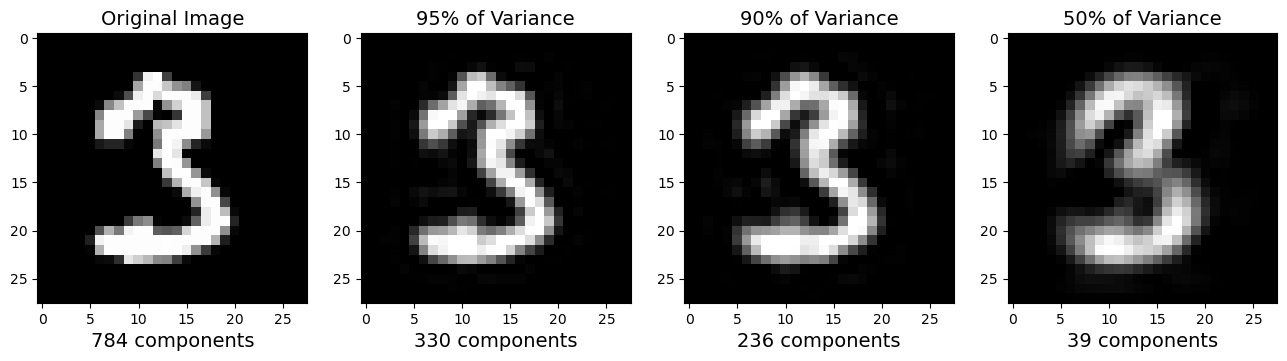

In [6]:
plt.figure(figsize=(16,4))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(res100_train_img.iloc[1,1:].values.reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 14)

# 330 principal components
plt.subplot(1, 4, 2)
plt.imshow(res95_train_img.iloc[1,1:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('330 components', fontsize = 14)
plt.title('95% of Variance', fontsize = 14)

# 236 principal components
plt.subplot(1, 4, 3)
plt.imshow(res90_train_img.iloc[1,1:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('236 components', fontsize = 14)
plt.title('90% of Variance', fontsize = 14)

# 39 principal components
plt.subplot(1, 4, 4)
plt.imshow(res50_train_img.iloc[1,1:].values.reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('39 components', fontsize = 14)
plt.title('50% of Variance', fontsize = 14)